# Sinusoidal Wave Control

<img src="figs/rotatory_wheel.jpg" alt="Description" width="400">


We can list the function for spine as: 

Therefore, assmue the frequency of the spine $f = \frac{1}{T} = \frac{1}{30} \ \text{Hz} $， we can find omega as $\omega = 2\pi f = \frac{2\pi}{30} \approx 0.2094 \ \text{rad/s}$

$L_{\text{spine}}(t) = \frac{\text{SpineLength}}{2} \cdot \sin(\omega t) + \frac{\text{SpineLength}}{2}, \quad \text{and} L_{\text{spine}}(t) \in [0, \text{SpineLength}]
$

Assume, the leg 0 has $ -\frac{\pi}{2}$ phase offset $ -\phi $ with the spine and leg 1 has constant $\pi$ offset with leg 0, we can express as follows:

$L_{\text{leg0}}(t) = \frac{\text{LegLength}}{2} \cdot \sin(\omega t - \phi) + \frac{\text{LegLength}}{2}, \quad \text{and} L_{\text{leg0}}(t) \in [0, \text{LegLength}]$


$L_{\text{leg1}}(t) = \frac{\text{LegLength}}{2} \cdot \sin(\omega t - \phi + \pi) + \frac{\text{LegLength}}{2}, \quad \text{and} L_{\text{leg1}}(t) \in [0, \text{LegLength}]
$

From the simple geomtry of the design, the leg length can be defined as:
$L_{leg} = r + r\cos(\theta), \quad \theta \in [0, \pi] $,
where r is the radius of the rotatory wheel, and essentially is $\frac{\text{LegLength}}{2}$

For spine, it would be a littble bit tricky, because the spine can only implement position control, so there is no direct time variant variable relates to the $L_{spine}$ in terms of pwm. In discrete time, it can be described as $L_{Spine}(t_k) = \frac{\text{pwm}_k}{255} \cdot \text{SpineLength}$

Therefore, if we consider it as desrete system where each step we give enough time for spine to move to target position, we can write control input as:

$\text{pwm}_k = \frac{255}{2} \sin(\omega t_k) + \frac{255}{2} $

$\theta_k^{(0)} = \arccos\left( {\sin(\omega t_k - \phi)} \right)$

$\theta_k^{(1)} = \arccos\left( \sin(\omega t_k - \phi + \pi)\right)$

Now lets plot the diagram for this

NaNs in theta0_k: 0
NaNs in theta1_k: 0


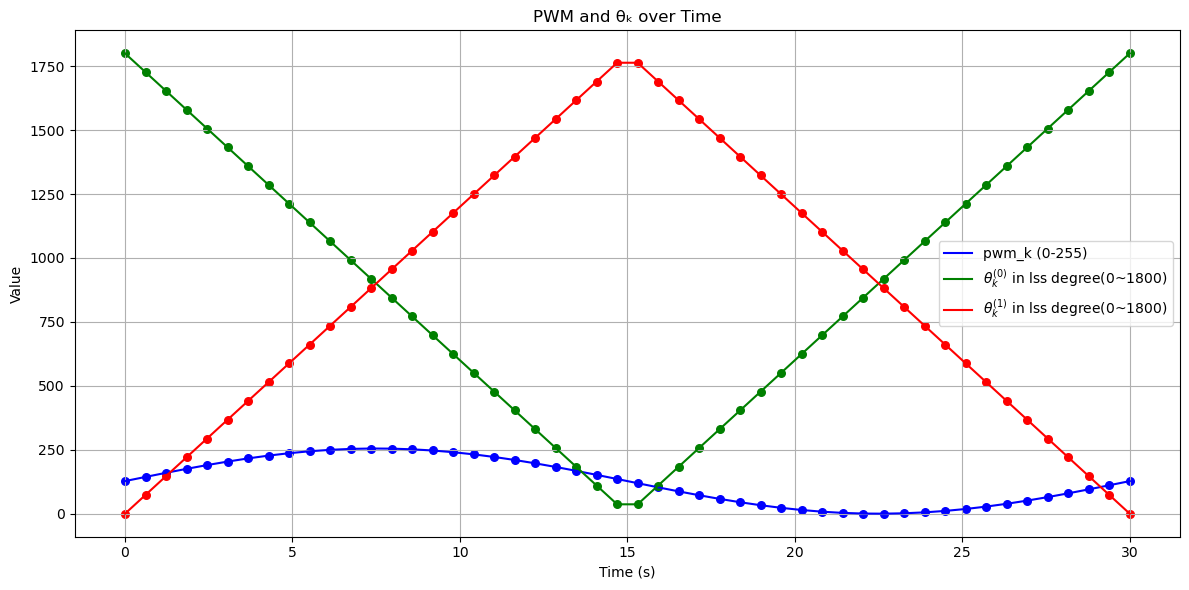

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

pi = np.pi

T = 30 
omega = 2*pi/T
phi = pi/2

t_k = np.linspace(0, T, 50)

pwm_k = (255/2)*np.sin(omega*t_k)+(255/2)

theta0_k = np.arccos(np.sin(omega*t_k-phi))
theta1_k = np.arccos(np.sin(omega*t_k-phi+pi))

theta0_k_lssdegree = (theta0_k/pi)*1800
theta1_k_lssdegree = (theta1_k/pi)*1800

print("NaNs in theta0_k:", np.isnan(theta0_k).sum())
print("NaNs in theta1_k:", np.isnan(theta1_k).sum())

plt.figure(figsize=(12, 6))
plt.plot(t_k, pwm_k, label='pwm_k (0-255)', color='blue')
plt.plot(t_k, theta0_k_lssdegree, label=r'$\theta_k^{(0)}$ in lss degree(0~1800)', color='green')
plt.plot(t_k, theta1_k_lssdegree, label=r'$\theta_k^{(1)}$ in lss degree(0~1800)', color='red')
plt.scatter(t_k, pwm_k, color='blue', s=30)
plt.scatter(t_k, theta0_k_lssdegree, color='green', s=30)
plt.scatter(t_k, theta1_k_lssdegree, color='red', s=30)
plt.xlabel('Time (s)')
plt.ylabel('Value')
plt.title('PWM and θₖ over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()